<a href="https://colab.research.google.com/github/abdulmateeng/ML_Projects/blob/main/p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
from scipy import stats

In [13]:
ep = np.load('/content/Intonation_L1_1.npy')
# ep

In [14]:
ep.shape

(13, 39)

In [15]:
ep.ndim

2

# DTW with KL Divergence

In [5]:
# lets try DTW
def dtwkl(arr1, arr2):
    n = len(arr1)
    m = len(arr2)
    max_val = 9999
    dis = [[0] * (m + 1) for _ in range(n + 1)]
    dirx = [[0] * (m + 1) for _ in range(n + 1)]
    diry = [[0] * (m + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        dis[i][0] = max_val

    for i in range(1, m + 1):
        dis[0][i] = max_val

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            mini = min(dis[i - 1][j], dis[i - 1][j - 1], dis[i][j - 1])
            dis[i][j] = dist(arr1[i - 1], arr2[j - 1]) + min(dis[i - 1][j], dis[i - 1][j - 1], dis[i][j - 1])
            if (mini == dis[i-1][j-1]):
              dirx[i][j] = -1
              diry[i][j] = -1
            elif (mini == dis[i-1][j]):
              dirx[i][j] = -1
              diry[i][j] = 0
            else:
              dirx[i][j] = 0
              diry[i][j] = -1
    ct = 0
    i = n
    j = m
    while (i > 0 and j > 0):
      i += dirx[i][j]
      j += diry[i][j]
      ct+=1
    # return(ct)
    # dividing by n+m to get normalized result
    return dis[n][m]/(ct+1)

def dist(a, b):
    # USE KL DIV .......
    s = 0
    for i in range(39):
      s = s + a[i]*(np.log((a[i]/b[i])))
    ss = 0
    for i in range(39):
      ss = ss + b[i]*(np.log((b[i]/a[i])))
    return((s+ss)/2);

In [6]:
from zipfile import ZipFile
with ZipFile ('/content/learner_gop_vector.zip') as obj:
  obj.extractall('/content/lrnr')

In [7]:
from zipfile import ZipFile
with ZipFile ('/content/expert_gop_vector.zip') as obj:
  obj.extractall('/content/experts/expert1')

In [8]:
from zipfile import ZipFile
with ZipFile ('/content/Indian_Usha_American_gop_vectors.zip') as obj:
  obj.extractall('/content/experts')

In [11]:
a = np.load('/content/anju_Intonation_L1_1.npy')
b = np.load('/content/Intonation_L1_1.npy')
a1 = np.exp(a) / np.sum(np.exp(a), axis=1, keepdims=True)
b1 = np.exp(b) / np.sum(np.exp(b), axis=1, keepdims=True)
dtwkl(a1, b1)

0.1279449991032628

In [17]:
import pandas as pd
d = pd.read_excel('/content/dataset.xlsx')

In [18]:
# df = pd.DataFrame(d)
# li = ['Intonation_L1_001']
# df_n = df[df['stimuli'].str.endswith("Intonation_L1_001")]
# # df_n.loc[0][1]

In [19]:
# Ratio of number of intelligible to unintelligible
ones = 0
zeroes = 0
for i in range(len(d)):
    s = d.iloc[i]['Ques1']
    if (s == 0):
      zeroes += 1
    else:
      ones += 1
print('Ratio of correct to wrong: ')
print(zeroes/ones)

Ratio of correct to wrong: 
7.405893536121673


In [20]:
d.head()

,stimuli,Ques1,Ques2,Ques3,Ques4,Ques5,Ques6,Ques7,#######,rating,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,anju_Intonation_L1_001,0,1,1,0,0,1,1,0,yes,1,NaN,NaN
1,anju_Intonation_L1_002,0,1,0,1,0,0,1,4,yes,2,NaN,NaN
2,anju_Intonation_L1_003,0,1,1,1,0,1,0,9,yes,NaN,NaN,NaN
3,anju_Intonation_L1_004,0,0,0,0,0,1,0,3,yes,NaN,NaN,NaN
4,anju_Intonation_L1_005,0,1,0,1,0,1,1,6,yes,NaN,NaN,NaN


In [21]:
# preprocessing the excel file - removing extra zeroes from file names
for i in range(len(d)):
  s = d.loc[i]['stimuli']
  ind = 0
  for j in range(len(s)):
    if (s[len(s)-1-j] == '_'):
      ind = len(s)-1-j
      break
  indd = ind
  ind += 1
  while(s[ind] == '0' and ind < len(s)):
    ind += 1;
  ss = (s[:indd+1] + s[ind:])
  d.at[i, 'stimuli'] = ss
d.head()

,stimuli,Ques1,Ques2,Ques3,Ques4,Ques5,Ques6,Ques7,#######,rating,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,anju_Intonation_L1_1,0,1,1,0,0,1,1,0,yes,1,NaN,NaN
1,anju_Intonation_L1_2,0,1,0,1,0,0,1,4,yes,2,NaN,NaN
2,anju_Intonation_L1_3,0,1,1,1,0,1,0,9,yes,NaN,NaN,NaN
3,anju_Intonation_L1_4,0,0,0,0,0,1,0,3,yes,NaN,NaN,NaN
4,anju_Intonation_L1_5,0,1,0,1,0,1,1,6,yes,NaN,NaN,NaN


In [22]:
# Checking the expert directory files
import os;
pathex = '/content/drive/MyDrive/Project/expert_gop_vector/gop_vector'
os.chdir(pathex)
ct = 0;
for file in os.listdir():
  # print(file)
  s = file
  print(s[:-4])
  ct += 1
  if (ct == 5):
    break;

Phoneme_L4_27-1
Phoneme_L4_7-1
Phoneme_L4_27-2
Phoneme_L4_4-1
Phoneme_L4_3-2


In [34]:
For expert 2
import os
flag = True
c1, c2, c3, c4 = ([] for i in range (4))
w1, w2, w3, w4 = ([] for i in range (4))
pathex = '/content/experts/american/gop_vector'
os.chdir(pathex)
for file in os.listdir():

  file1 = '/content/experts/expert1/gop_vector/'
  file1 += file
  if os.path.exists(file1):
    flag = False
    ept1 = np.load(file1)
    softmax_data1 = np.exp(ept1) / np.sum(np.exp(ept1), axis=1, keepdims=True)

  file2 = '/content/experts/american/gop_vector/'
  file2 += file
  ept2 = np.load(file2)
  softmax_data2 = np.exp(ept2) / np.sum(np.exp(ept2), axis=1, keepdims=True)

  file3 = '/content/experts/indian/gop_vector/'
  file3 += file
  ept3 = np.load(file3)
  softmax_data3 = np.exp(ept3) / np.sum(np.exp(ept3), axis=1, keepdims=True)

  file4 = '/content/experts/usha/gop_vector/'
  file4 += file
  ept4 = np.load(file4)
  softmax_data4 = np.exp(ept4) / np.sum(np.exp(ept4), axis=1, keepdims=True)

  path = '/content/lrnr/gop_vector'
  df = pd.DataFrame(d)
  s = file
  df_n = df[df['stimuli'].str.endswith(s[:-4])]
  dd = df_n
  # dd

  for i in range(len(df_n)):
    p = dd.iloc[i]['stimuli']
    # print(p)
    if (p == ("sunitha_" + s[:-4])):
      p = ("Sunitha_" + s[:-4])
    file_path = (path +'/'+ p+'.npy')
    # print(file_path)
    if os.path.exists(file_path):
      lr = np.load(file_path)
    else:
      continue
    softmax_datalr = np.exp(lr) / np.sum(np.exp(lr), axis=1, keepdims=True)
    # a.append(dtw(softmax_data2, softmax_data1))
    # Checking if correct
    if(dd.iloc[i]['Ques1'] == 0):
      if(flag == False):
        c1.append(dtwkl(softmax_data1, softmax_datalr))
      c2.append(dtwkl(softmax_data2, softmax_datalr))
      c3.append(dtwkl(softmax_data3, softmax_datalr))
      c4.append(dtwkl(softmax_data4, softmax_datalr))
    else:
      if(flag == False):
        w1.append(dtwkl(softmax_data1, softmax_datalr))
      w2.append(dtwkl(softmax_data2, softmax_datalr))
      w3.append(dtwkl(softmax_data3, softmax_datalr))
      w4.append(dtwkl(softmax_data4, softmax_datalr))
c2 = np.array(c2)
w2 = np.array(w2)

In [35]:
c1 = np.array(c1)
w1 = np.array(w1)
c3 = np.array(c3)
w3 = np.array(w3)
c4 = np.array(c4)
w4 = np.array(w4)

In [ ]:
# # For expert 3
# import os
# c3 = []
# c4 = []
# w3 = []
# w4 = []
# pathex = '/content/oth_expert/indian/gop_vector'
# os.chdir(pathex)
# for file in os.listdir():
#   ept = np.load(file)
#   filee = '/content/oth_expert/usha/gop_vector/'
#   filee += 'file'
#   eptt = np.load(file)
#   softmax_data1 = np.exp(ept) / np.sum(np.exp(ept), axis=1, keepdims=True)
#   softmax_data11 = np.exp(eptt) / np.sum(np.exp(eptt), axis=1, keepdims=True)
#   path = '/content/lrnr/gop_vector'
#   df = pd.DataFrame(d)
#   s = file
#   # Removing '.npy' from name
#   df_n = df[df['stimuli'].str.endswith(s[:-4])]
#   dd = df_n
#   # dd
#   for i in range(len(df_n)):
#     p = dd.iloc[i]['stimuli']
#     # print(p)
#     if (p == ("sunitha_" + s[:-4])):
#       p = ("Sunitha_" + s[:-4])
#     file_path = (path +'/'+ p+'.npy')
#     # print(file_path)
#     if os.path.exists(file_path):
#       lr = np.load(file_path)
#     else:
#       continue
#     softmax_data2 = np.exp(lr) / np.sum(np.exp(lr), axis=1, keepdims=True)
#     # a.append(dtw(softmax_data2, softmax_data1))
#     # Checking if correct
#     if(dd.iloc[i]['Ques1'] == 0):
#       c3.append(dtwkl(softmax_data1, softmax_data2))
#     else:
#       w3.append(dtwkl(softmax_data1, softmax_data2))
#     if(dd.iloc[i]['Ques1'] == 0):
#       c4.append(dtwkl(softmax_data11, softmax_data2))
#     else:
#       w4.append(dtwkl(softmax_data11, softmax_data2))
# c3 = np.array(c3)
# w3 = np.array(w3)
# c4 = np.array(c4)
# w4 = np.array(w4)

In [37]:
cols = ['c1', 'w1', 'c2', 'w2', 'c3', 'w3', 'c4', 'w4']
cwdf = pd.DataFrame(list(zip(c1, w1, c2, w2, c3, w3, c4, w4)), columns = cols)
# cwdf.head()
cwdf.to_excel('/content/cwdf1.xlsx')

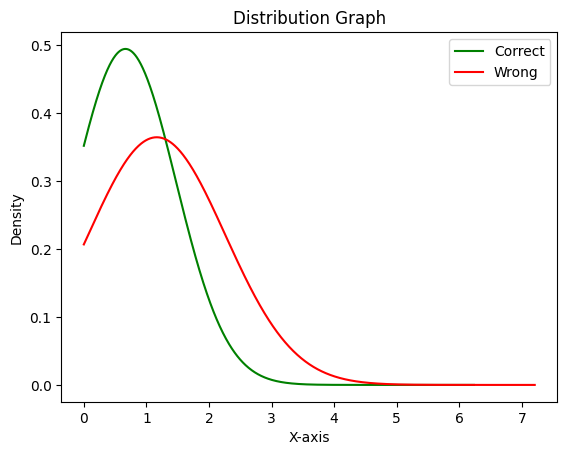

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

datac = c1
dataw = w1

# Plot KDE (Kernel Density Estimate)
kdec = norm.pdf(np.linspace(min(datac), max(datac), 1000), np.mean(datac), np.std(datac))
kdew = norm.pdf(np.linspace(min(dataw), max(dataw), 1000), np.mean(dataw), np.std(dataw))
plt.plot(np.linspace(min(datac), max(datac), 1000), kdec, color='green', label='Correct')
plt.plot(np.linspace(min(dataw), max(dataw), 1000), kdew, color='red', label='Wrong')

# Add labels and title
plt.title('Distribution Graph')
plt.xlabel('X-axis')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


In [43]:
import numpy as np
import matplotlib.pyplot as plt

def solve_for_threshold(m1,m2,std1,std2):
    """Used methamatical formula to calculate the intersection.

    Args:
        m1 (float): mean of 1st distribution.
        m2 (float): mean of 2nd distribution.
        std1 (float): standard distribution of 1st distribution.
        std2 (float): standard distribution of 2nd distribution.

    Returns:
       float : intersection point
    """
    # the method id to solve the gaussian eqautions to find the roots where ever it
    # intersects , i.e give roots of the equation.
    a = 1/(2*std1**2) - 1/(2*std2**2)
    b = m2/(std2**2) - m1/(std1**2)
    c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
    roots = np.roots([a,b,c])
    for i in range(len(roots)):
        if roots[i] >= np.min([m1, m2]):
            return roots[i]

thr1 = solve_for_threshold(np.mean(c1),np.mean(w1),np.std(c1),np.std(w1))
thr2 = solve_for_threshold(np.mean(c2),np.mean(w2),np.std(c2),np.std(w2))
thr3 = solve_for_threshold(np.mean(c3),np.mean(w3),np.std(c3),np.std(w3))
thr4 = solve_for_threshold(np.mean(c4),np.mean(w4),np.std(c4),np.std(w4))
print ('threshold for expert 1: ', thr1)
print ('threshold for expert 2: ', thr2)
print ('threshold for expert 3: ', thr3)
print ('threshold for expert 4: ', thr4)

threshold for expert 1:  1.3031127752008507
threshold for expert 2:  1.6255002986193992
threshold for expert 3:  1.2847117499705798
threshold for expert 4:  1.0328124121109497


In [45]:
# Loading mapping file
X = pd.read_csv('/content/mapping', header = None)

In [46]:
X.columns = ['files']
X

,files
0,shiva1_Phoneme_L6_3-3
1,venkatt_Stress_L3_1
2,sunitha_Sentence_L2_12
3,bibin_Stress_L3_24
4,anju_Phoneme_L8_6-1
...,...
12529,venktapa_Sentence_L3_14
12530,shiva1_Stress_L2_33
12531,stephy_Phoneme_L5_32-2
12532,anju_Phoneme_L6_15-2


In [48]:
# for exp1
corr = 0
wrong = 0
for i in range(len(X)):
  path_exp1 = X.loc[i]['files']
  # print(path_exp1)
  for j in range(len(path_exp1)):
    if (path_exp1[j] == '_'):
      break
  j += 1
  # p = path_exp1[j:]
  path_exp = '/content/experts/expert1/gop_vector/' +  path_exp1[j:-1] + '.npy'
  ep = np.load(path_exp)
  softmax_data3 = np.exp(ep) / np.sum(np.exp(ep), axis=1, keepdims=True)
  path_exp11 = path_exp1
  if (path_exp1 == ("sunitha_" + path_exp1[8:])):
    path_exp1 = ("Sunitha_" + path_exp1[8:])
  # # print(path_exp1)
  # else:
  #   chk = path_exp1
  path_lrnr = '/content/lrnr/gop_vector/' + path_exp1[:-1] + '.npy'
  # print(path_lrnr)
  lr = np.load(path_lrnr)
  softmax_data4 = np.exp(lr) / np.sum(np.exp(lr), axis=1, keepdims=True)
  dis = dtwkl(softmax_data3, softmax_data4)
  # print(dis)
  df_n = df[df['stimuli'].str.endswith(path_exp11[:-1])]
  dd = df_n
  # print(dd)
  if (dis <= thr1):
    if(dd.iloc[0]['Ques1'] == 0):
      corr += 1
  else:
    if(dd.iloc[0]['Ques1'] == 1):
      corr += 1
print("Accuracy wrt to exp 1: ")
(corr/len(X))*100

Accuracy wrt to exp 1: 


77.78043721078666

In [53]:
# for exp2
corr = 0
wrong = 0
for i in range(len(X)):
  path_exp1 = X.loc[i]['files']
  # print(path_exp1)
  for j in range(len(path_exp1)):
    if (path_exp1[j] == '_'):
      break
  j += 1
  # p = path_exp1[j:]
  path_exp = '/content/experts/american/gop_vector/' +  path_exp1[j:-1] + '.npy'
  ep = np.load(path_exp)
  softmax_data3 = np.exp(ep) / np.sum(np.exp(ep), axis=1, keepdims=True)
  path_exp11 = path_exp1
  if (path_exp1 == ("sunitha_" + path_exp1[8:])):
    path_exp1 = ("Sunitha_" + path_exp1[8:])
  # # print(path_exp1)
  # else:
  #   chk = path_exp1
  path_lrnr = '/content/lrnr/gop_vector/' + path_exp1[:-1] + '.npy'
  # print(path_lrnr)
  lr = np.load(path_lrnr)
  softmax_data4 = np.exp(lr) / np.sum(np.exp(lr), axis=1, keepdims=True)
  dis = dtwkl(softmax_data3, softmax_data4)
  # print(dis)
  df_n = df[df['stimuli'].str.endswith(path_exp11[:-1])]
  dd = df_n
  # print(dd)
  # taking Threshold distance apprximately from graph
  if (dis <= thr2):
    if(dd.iloc[0]['Ques1'] == 0):
      corr += 1
  else:
    if(dd.iloc[0]['Ques1'] == 1):
      corr += 1
print("Accuracy wrt exp 2: ")
(corr/len(X))*100

Accuracy for KL div: 


77.18206478378809

In [54]:
# for exp3
corr = 0
wrong = 0
for i in range(len(X)):
  path_exp1 = X.loc[i]['files']
  for j in range(len(path_exp1)):
    if (path_exp1[j] == '_'):
      break
  j += 1
  path_exp = '/content/experts/indian/gop_vector/' +  path_exp1[j:-1] + '.npy'
  ep = np.load(path_exp)
  softmax_data3 = np.exp(ep) / np.sum(np.exp(ep), axis=1, keepdims=True)
  path_exp11 = path_exp1
  if (path_exp1 == ("sunitha_" + path_exp1[8:])):
    path_exp1 = ("Sunitha_" + path_exp1[8:])
  path_lrnr = '/content/lrnr/gop_vector/' + path_exp1[:-1] + '.npy'
  lr = np.load(path_lrnr)
  softmax_data4 = np.exp(lr) / np.sum(np.exp(lr), axis=1, keepdims=True)
  dis = dtwkl(softmax_data3, softmax_data4)
  df_n = df[df['stimuli'].str.endswith(path_exp11[:-1])]
  dd = df_n
  if (dis <= thr3):
    if(dd.iloc[0]['Ques1'] == 0):
      corr += 1
  else:
    if(dd.iloc[0]['Ques1'] == 1):
      corr += 1
print("Accuracy wrt exp 3: ")
(corr/len(X))*100

Accuracy for KL div: 


76.74325833732249

In [55]:
# for exp4
corr = 0
wrong = 0
for i in range(len(X)):
  path_exp1 = X.loc[i]['files']
  for j in range(len(path_exp1)):
    if (path_exp1[j] == '_'):
      break
  j += 1
  path_exp = '/content/experts/usha/gop_vector/' +  path_exp1[j:-1] + '.npy'
  ep = np.load(path_exp)
  softmax_data3 = np.exp(ep) / np.sum(np.exp(ep), axis=1, keepdims=True)
  path_exp11 = path_exp1
  if (path_exp1 == ("sunitha_" + path_exp1[8:])):
    path_exp1 = ("Sunitha_" + path_exp1[8:])
  path_lrnr = '/content/lrnr/gop_vector/' + path_exp1[:-1] + '.npy'
  lr = np.load(path_lrnr)
  softmax_data4 = np.exp(lr) / np.sum(np.exp(lr), axis=1, keepdims=True)
  dis = dtwkl(softmax_data3, softmax_data4)
  df_n = df[df['stimuli'].str.endswith(path_exp11[:-1])]
  dd = df_n
  if (dis <= thr4):
    if(dd.iloc[0]['Ques1'] == 0):
      corr += 1
  else:
    if(dd.iloc[0]['Ques1'] == 1):
      corr += 1
print("Accuracy wrt exp 4: ")
(corr/len(X))*100

Accuracy for KL div: 


84.41040370193075

In [56]:
# Overall Accuracy
corr = 0
wrong = 0
for i in range(len(X)):
  path_exp1 = X.loc[i]['files']
  for j in range(len(path_exp1)):
    if (path_exp1[j] == '_'):
      break
  j += 1
  path_expep1 = '/content/experts/expert1/gop_vector/' +  path_exp1[j:-1] + '.npy'
  ep1 = np.load(path_expep1)
  softmax_dataep1 = np.exp(ep1) / np.sum(np.exp(ep1), axis=1, keepdims=True)

  path_expep2 = '/content/experts/american/gop_vector/' +  path_exp1[j:-1] + '.npy'
  ep2 = np.load(path_expep2)
  softmax_dataep2 = np.exp(ep2) / np.sum(np.exp(ep2), axis=1, keepdims=True)

  path_expep3 = '/content/experts/indian/gop_vector/' +  path_exp1[j:-1] + '.npy'
  ep3 = np.load(path_expep3)
  softmax_dataep3 = np.exp(ep3) / np.sum(np.exp(ep3), axis=1, keepdims=True)

  path_expep4 = '/content/experts/usha/gop_vector/' +  path_exp1[j:-1] + '.npy'
  ep4 = np.load(path_expep4)
  softmax_dataep4 = np.exp(ep4) / np.sum(np.exp(ep4), axis=1, keepdims=True)

  path_exp11 = path_exp1
  if (path_exp1 == ("sunitha_" + path_exp1[8:])):
    path_exp1 = ("Sunitha_" + path_exp1[8:])
  path_lrnr = '/content/lrnr/gop_vector/' + path_exp1[:-1] + '.npy'
  lr = np.load(path_lrnr)
  softmax_datalr = np.exp(lr) / np.sum(np.exp(lr), axis=1, keepdims=True)
  dis1 = dtwkl(softmax_datalr, softmax_dataep1)
  dis2 = dtwkl(softmax_datalr, softmax_dataep2)
  dis3 = dtwkl(softmax_datalr, softmax_dataep3)
  dis4 = dtwkl(softmax_datalr, softmax_dataep4)
  df_n = df[df['stimuli'].str.endswith(path_exp11[:-1])]
  dd = df_n
  ct = 0
  if (dis1 <= thr1):
    ct += 1
  if (dis2 <= thr2):
    ct += 1
  if (dis3 <= thr3):
    ct += 1
  if (dis4 <= thr4):
    ct += 1
  if(dd.iloc[0]['Ques1'] == 0 and ct >= 2):
    corr += 1
  elif (dd.iloc[0]['Ques1'] == 0 and ct < 2):
    wrong += 1
  if(dd.iloc[0]['Ques1'] == 1 and ct >= 2):
    wrong += 1
  elif(dd.iloc[0]['Ques1'] == 1 and ct < 2):
    corr += 1
print("Accuracy for KL div: ")
(corr/len(X))*100

Accuracy for KL div: 


84.1152066379448

For 20% Train and 80% Test

In [83]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(X, test_size = 0.8)
len(train)

2506

In [81]:
# For expert 2
import os
flag = True
c21, c22, c23, c24 = ([] for i in range (4))
w21, w22, w23, w24 = ([] for i in range (4))
for i in range(len(train)):
  s = train.iloc[i]['files']
  ss = s
  for j in range(len(path_exp1)):
    if (s[j] == '_'):
      break
  j += 1
  file1 = '/content/experts/expert1/gop_vector/'
  file1 += (s[j:-1] + '.npy')
  # print(file1)
  if os.path.exists(file1):
    flag = False
    ept1 = np.load(file1)
    softmax_data1 = np.exp(ept1) / np.sum(np.exp(ept1), axis=1, keepdims=True)

  file2 = '/content/experts/american/gop_vector/'
  file2 += (s[j:-1] + '.npy')
  ept2 = np.load(file2)
  softmax_data2 = np.exp(ept2) / np.sum(np.exp(ept2), axis=1, keepdims=True)

  file3 = '/content/experts/indian/gop_vector/'
  file3 += (s[j:-1] + '.npy')
  ept3 = np.load(file3)
  softmax_data3 = np.exp(ept3) / np.sum(np.exp(ept3), axis=1, keepdims=True)

  file4 = '/content/experts/usha/gop_vector/'
  file4 += (s[j:-1] + '.npy')
  ept4 = np.load(file4)
  softmax_data4 = np.exp(ept4) / np.sum(np.exp(ept4), axis=1, keepdims=True)

  path = '/content/lrnr/gop_vector'
  df = pd.DataFrame(d)
  # print(ss)
  df_n = df[df['stimuli'].str.endswith(ss[:-1])]
  dd = df_n
  # print(dd)

  for i in range(len(df_n)):
    p = dd.iloc[i]['stimuli']
    # print(p)
    if (p == ("sunitha_" + s[j:-1])):
      p = ("Sunitha_" + s[j:-1])
    file_path = (path +'/'+ p+'.npy')
    # print(file_path)
    if os.path.exists(file_path):
      lr = np.load(file_path)
    else:
      continue
    softmax_datalr = np.exp(lr) / np.sum(np.exp(lr), axis=1, keepdims=True)
    # a.append(dtw(softmax_data2, softmax_data1))
    # Checking if correct
    if(dd.iloc[i]['Ques1'] == 0):
      if(flag == False):
        c21.append(dtwkl(softmax_data1, softmax_datalr))
      c22.append(dtwkl(softmax_data2, softmax_datalr))
      c23.append(dtwkl(softmax_data3, softmax_datalr))
      c24.append(dtwkl(softmax_data4, softmax_datalr))
    else:
      if(flag == False):
        w21.append(dtwkl(softmax_data1, softmax_datalr))
      w22.append(dtwkl(softmax_data2, softmax_datalr))
      w23.append(dtwkl(softmax_data3, softmax_datalr))
      w24.append(dtwkl(softmax_data4, softmax_datalr))
c21 = np.array(c21)
c22 = np.array(c22)

In [91]:
c21 = np.array(c21)
c22 = np.array(c22)
c23 = np.array(c23)
c24 = np.array(c24)
w21 = np.array(w21)
w22 = np.array(w22)
w23 = np.array(w23)
w24 = np.array(w24)

In [94]:
thr21 = solve_for_threshold(np.mean(c21),np.mean(w21),np.std(c21),np.std(w21))
thr22 = solve_for_threshold(np.mean(c22),np.mean(w22),np.std(c22),np.std(w22))
thr23 = solve_for_threshold(np.mean(c23),np.mean(w23),np.std(c23),np.std(w23))
thr24 = solve_for_threshold(np.mean(c24),np.mean(w24),np.std(c24),np.std(w24))

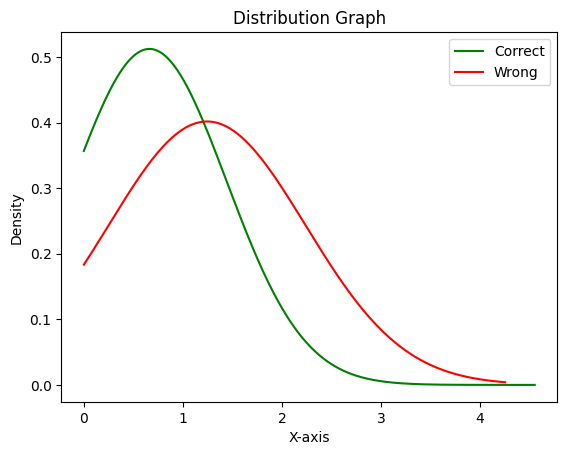

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

datac = c21
dataw = w21

# Plot KDE (Kernel Density Estimate)
kdec = norm.pdf(np.linspace(min(datac), max(datac), 1000), np.mean(datac), np.std(datac))
kdew = norm.pdf(np.linspace(min(dataw), max(dataw), 1000), np.mean(dataw), np.std(dataw))
plt.plot(np.linspace(min(datac), max(datac), 1000), kdec, color='green', label='Correct')
plt.plot(np.linspace(min(dataw), max(dataw), 1000), kdew, color='red', label='Wrong')

# Add labels and title
plt.title('Distribution Graph')
plt.xlabel('X-axis')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


In [98]:
# for exp1
corr = 0
wrong = 0
for i in range(len(test)):
  path_exp1 = test.iloc[i]['files']
  # print(path_exp1)
  for j in range(len(path_exp1)):
    if (path_exp1[j] == '_'):
      break
  j += 1
  # p = path_exp1[j:]
  path_exp = '/content/experts/expert1/gop_vector/' +  path_exp1[j:-1] + '.npy'
  ep = np.load(path_exp)
  softmax_data3 = np.exp(ep) / np.sum(np.exp(ep), axis=1, keepdims=True)
  path_exp11 = path_exp1
  if (path_exp1 == ("sunitha_" + path_exp1[8:])):
    path_exp1 = ("Sunitha_" + path_exp1[8:])
  # # print(path_exp1)
  # else:
  #   chk = path_exp1
  path_lrnr = '/content/lrnr/gop_vector/' + path_exp1[:-1] + '.npy'
  # print(path_lrnr)
  lr = np.load(path_lrnr)
  softmax_data4 = np.exp(lr) / np.sum(np.exp(lr), axis=1, keepdims=True)
  dis = dtwkl(softmax_data3, softmax_data4)
  # print(dis)
  df_n = df[df['stimuli'].str.endswith(path_exp11[:-1])]
  dd = df_n
  # print(dd)
  if (dis <= thr1):
    if(dd.iloc[0]['Ques1'] == 0):
      corr += 1
  else:
    if(dd.iloc[0]['Ques1'] == 1):
      corr += 1
print("Accuracy wrt to exp 1: ")
(corr/len(X))*100

Accuracy wrt to exp 1: 


62.25466730493059

In [100]:
# Overall Accuracy
corr = 0
wrong = 0
for i in range(len(test)):
  path_exp1 = test.iloc[i]['files']
  for j in range(len(path_exp1)):
    if (path_exp1[j] == '_'):
      break
  j += 1
  path_expep1 = '/content/experts/expert1/gop_vector/' +  path_exp1[j:-1] + '.npy'
  ep1 = np.load(path_expep1)
  softmax_dataep1 = np.exp(ep1) / np.sum(np.exp(ep1), axis=1, keepdims=True)

  path_expep2 = '/content/experts/american/gop_vector/' +  path_exp1[j:-1] + '.npy'
  ep2 = np.load(path_expep2)
  softmax_dataep2 = np.exp(ep2) / np.sum(np.exp(ep2), axis=1, keepdims=True)

  path_expep3 = '/content/experts/indian/gop_vector/' +  path_exp1[j:-1] + '.npy'
  ep3 = np.load(path_expep3)
  softmax_dataep3 = np.exp(ep3) / np.sum(np.exp(ep3), axis=1, keepdims=True)

  path_expep4 = '/content/experts/usha/gop_vector/' +  path_exp1[j:-1] + '.npy'
  ep4 = np.load(path_expep4)
  softmax_dataep4 = np.exp(ep4) / np.sum(np.exp(ep4), axis=1, keepdims=True)

  path_exp11 = path_exp1
  if (path_exp1 == ("sunitha_" + path_exp1[8:])):
    path_exp1 = ("Sunitha_" + path_exp1[8:])
  path_lrnr = '/content/lrnr/gop_vector/' + path_exp1[:-1] + '.npy'
  lr = np.load(path_lrnr)
  softmax_datalr = np.exp(lr) / np.sum(np.exp(lr), axis=1, keepdims=True)
  dis1 = dtwkl(softmax_datalr, softmax_dataep1)
  dis2 = dtwkl(softmax_datalr, softmax_dataep2)
  dis3 = dtwkl(softmax_datalr, softmax_dataep3)
  dis4 = dtwkl(softmax_datalr, softmax_dataep4)
  df_n = df[df['stimuli'].str.endswith(path_exp11[:-1])]
  dd = df_n
  ct = 0
  if (dis1 <= thr1):
    ct += 1
  if (dis2 <= thr2):
    ct += 1
  if (dis3 <= thr3):
    ct += 1
  if (dis4 <= thr4):
    ct += 1
  if(dd.iloc[0]['Ques1'] == 0 and ct >= 2):
    corr += 1
  elif (dd.iloc[0]['Ques1'] == 0 and ct < 2):
    wrong += 1
  if(dd.iloc[0]['Ques1'] == 1 and ct >= 2):
    wrong += 1
  elif(dd.iloc[0]['Ques1'] == 1 and ct < 2):
    corr += 1
print("Accuracy for KL div: ")
(corr/len(X))*100

Accuracy for KL div: 


67.34482208393172

In [101]:
req = []
unnamed = []
american = []
indian = []
usha = []
for i in range(len(X)):
  # if (ctt == 5):
  #   break
  path_exp1 = X.loc[i]['files']
  req.append(path_exp1)
  if (path_exp1 == ("sunitha_" + path_exp1[8:])):
    path_exp1 = ("Sunitha_" + path_exp1[8:])
  # print(path_exp1)
  path_lrnr = '/content/lrnr/gop_vector/' + path_exp1[:-1] + '.npy'
  # print(path_lrnr)
  lnr = np.load(path_lrnr)
  softmax_lr = np.exp(lnr) / np.sum(np.exp(lnr), axis=1, keepdims=True)
  for j in range(len(path_exp1)):
    if (path_exp1[j] == '_'):
      break
  j += 1
  path_ep1 = '/content/experts/expert1/gop_vector/' +  path_exp1[j:-1] + '.npy'
  # print(path_ep1)
  ep1 = np.load(path_ep1)
  softmax_ep1 = np.exp(ep1) / np.sum(np.exp(ep1), axis=1, keepdims=True)
  unnamed.append(dtwkl(softmax_ep1, softmax_lr))

  path_ep2 = '/content/experts/american/gop_vector/' +  path_exp1[j:-1] + '.npy'
  ep2 = np.load(path_ep2)
  softmax_ep2 = np.exp(ep2) / np.sum(np.exp(ep2), axis=1, keepdims=True)
  american.append(dtwkl(softmax_ep2, softmax_lr))

  path_ep3 = '/content/experts/indian/gop_vector/' +  path_exp1[j:-1] + '.npy'
  ep3 = np.load(path_ep3)
  softmax_ep3 = np.exp(ep3) / np.sum(np.exp(ep3), axis=1, keepdims=True)
  indian.append(dtwkl(softmax_ep3, softmax_lr))

  path_ep4 = '/content/experts/usha/gop_vector/' +  path_exp1[j:-1] + '.npy'
  ep4 = np.load(path_ep4)
  softmax_ep4 = np.exp(ep4) / np.sum(np.exp(ep4), axis=1, keepdims=True)
  usha.append(dtwkl(softmax_ep4, softmax_lr))
cols = ['req', 'exp1', 'exp2_american', 'exp3_indian', 'exp4_usha']
df = pd.DataFrame(list(zip(req,unnamed,american, indian, usha)), columns=cols)
print("Create DataFrame:\n", df)
df.to_excel('/content/t2.xlsx')
print(df)

Create DataFrame:
                               req      exp1  exp2_american  exp3_indian  \
0          shiva1_Phoneme_L6_3-3   0.000101       0.000202     0.000201   
1            venkatt_Stress_L3_1   1.327781       0.042321     2.306412   
2         sunitha_Sentence_L2_12   0.518401       0.578370     1.008129   
3             bibin_Stress_L3_24   0.137112       0.141162     0.091124   
4            anju_Phoneme_L8_6-1   0.215365       1.672888     1.248309   
...                           ...       ...            ...          ...   
12529    venktapa_Sentence_L3_14   0.056136       1.802619     1.374469   
12530        shiva1_Stress_L2_33   0.811751       0.837207     0.807548   
12531     stephy_Phoneme_L5_32-2   0.005659       0.007934     0.010372   
12532       anju_Phoneme_L6_15-2   2.322002       3.782127     0.358821   
12533  maheshaa_Phoneme_L1_125-1   0.924942       0.424952     0.671080   

       exp4_usha  
0       0.003187  
1       0.027671  
2       0.542826  
3   

# DTW with Mean absolute error

In [ ]:
# lets try DTW
def dtw1(arr1, arr2):
    n = len(arr1)
    m = len(arr2)
    max_val = 9999
    dis = [[0] * (m + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        dis[i][0] = max_val

    for i in range(1, m + 1):
        dis[0][i] = max_val

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            dis[i][j] = mae(arr1[i - 1], arr2[j - 1]) + min(dis[i - 1][j], dis[i - 1][j - 1], dis[i][j - 1])
    # print(dis)
    # dividing by n+m to get normalized result
    return dis[n][m]/(n+m)

def mae(p, q):
  s = 0
  for i in range(39):
    s += abs(p[i]-q[i])
  return (s/39)

In [ ]:
import os
c = []
w = []
pathex = '/content/expert/gop_vector'
os.chdir(pathex)
for file in os.listdir():
  ept = np.load(file)
  # softmax_data1 = np.exp(ept) / np.sum(np.exp(ept), axis=1, keepdims=True)
  path = '/content/lrnr/gop_vector'
  df = pd.DataFrame(d)
  s = file
  # Removing '.npy' from name
  df_n = df[df['stimuli'].str.endswith(s[:-4])]
  dd = df_n
  # dd
  for i in range(len(df_n)):
    p = dd.iloc[i]['stimuli']
    # print(p)
    if (p == ("sunitha_" + s[:-4])):
      p = ("Sunitha_" + s[:-4])
    file_path = (path +'/'+ p+'.npy')
    # print(file_path)
    lr = np.load(file_path)
    # softmax_data2 = np.exp(lr) / np.sum(np.exp(lr), axis=1, keepdims=True)
    # a.append(dtw(softmax_data2, softmax_data1))
    # Checking if correct
    if(dd.iloc[i]['Ques1'] == 0):
      c.append(dtw1(lr, ept))
    else:
      w.append(dtw1(lr, ept))
c = np.array(c)
w = np.array(w)

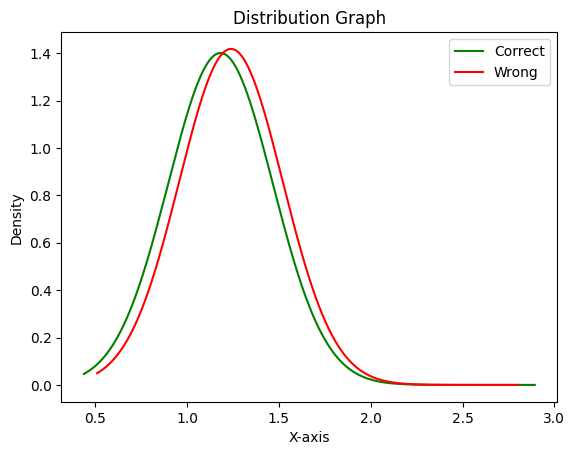

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

datac = c
dataw = w

# Plot KDE (Kernel Density Estimate)
kdec = norm.pdf(np.linspace(min(datac), max(datac), 1000), np.mean(datac), np.std(datac))
kdew = norm.pdf(np.linspace(min(dataw), max(dataw), 1000), np.mean(dataw), np.std(dataw))
plt.plot(np.linspace(min(datac), max(datac), 1000), kdec, color='green', label='Correct')
plt.plot(np.linspace(min(dataw), max(dataw), 1000), kdew, color='red', label='Wrong')

# Add labels and title
plt.title('Distribution Graph')
plt.xlabel('X-axis')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


# DTW - Cosine Distance

In [ ]:
# lets try DTW
def dtw2(arr1, arr2):
    n = len(arr1)
    m = len(arr2)
    max_val = 9999
    dis = [[0] * (m + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        dis[i][0] = max_val

    for i in range(1, m + 1):
        dis[0][i] = max_val

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            dis[i][j] = cosdist(arr1[i - 1], arr2[j - 1]) + min(dis[i - 1][j], dis[i - 1][j - 1], dis[i][j - 1])
    # print(dis)
    # dividing by n+m to get normalized result
    return dis[n][m]/(n+m)

def cosdist(a, b):
  return (np.dot(a, b)/(np.sqrt(np.dot(a,a)) * (np.sqrt(np.dot(b,b)))))

In [ ]:
import os
c = []
w = []
pathex = '/content/expert/gop_vector'
os.chdir(pathex)
for file in os.listdir():
  ept = np.load(file)
  # softmax_data1 = np.exp(ept) / np.sum(np.exp(ept), axis=1, keepdims=True)
  path = '/content/lrnr/gop_vector'
  df = pd.DataFrame(d)
  s = file
  # Removing '.npy' from name
  df_n = df[df['stimuli'].str.endswith(s[:-4])]
  dd = df_n
  # dd
  for i in range(len(df_n)):
    p = dd.iloc[i]['stimuli']
    # print(p)
    if (p == ("sunitha_" + s[:-4])):
      p = ("Sunitha_" + s[:-4])
    file_path = (path +'/'+ p+'.npy')
    # print(file_path)
    lr = np.load(file_path)
    # softmax_data2 = np.exp(lr) / np.sum(np.exp(lr), axis=1, keepdims=True)
    # a.append(dtw(softmax_data2, softmax_data1))
    # Checking if correct
    if(dd.iloc[i]['Ques1'] == 0):
      c.append(dtw2(lr, ept))
    else:
      w.append(dtw2(lr, ept))
c = np.array(c)
w = np.array(w)

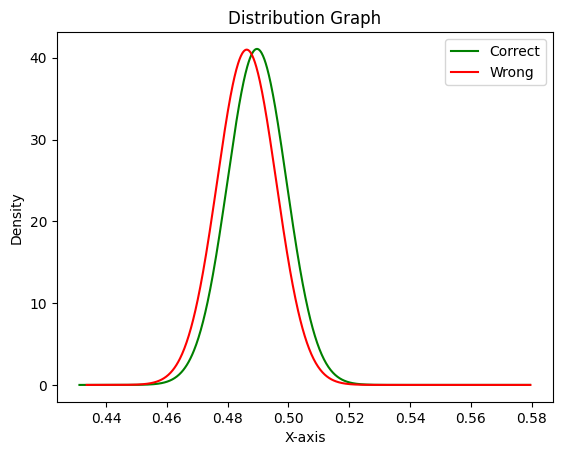

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

datac = c
dataw = w

# Plot KDE (Kernel Density Estimate)
kdec = norm.pdf(np.linspace(min(datac), max(datac), 1000), np.mean(datac), np.std(datac))
kdew = norm.pdf(np.linspace(min(dataw), max(dataw), 1000), np.mean(dataw), np.std(dataw))
plt.plot(np.linspace(min(datac), max(datac), 1000), kdec, color='green', label='Correct')
plt.plot(np.linspace(min(dataw), max(dataw), 1000), kdew, color='red', label='Wrong')

# Add labels and title
plt.title('Distribution Graph')
plt.xlabel('X-axis')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


# DTW - MSE

In [ ]:
# lets try DTW
def dtw3(arr1, arr2):
    n = len(arr1)
    m = len(arr2)
    max_val = 9999
    dis = [[0] * (m + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        dis[i][0] = max_val

    for i in range(1, m + 1):
        dis[0][i] = max_val

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            dis[i][j] = mse(arr1[i - 1], arr2[j - 1]) + min(dis[i - 1][j], dis[i - 1][j - 1], dis[i][j - 1])
    # print(dis)
    # dividing by n+m to get normalized result
    return dis[n][m]/(n+m)

def mse(p, q):
  s = 0
  for i in range(39):
    s += ((p[i]-q[i])**2)
  return (np.sqrt(s)/39)

In [ ]:
import os
c = []
w = []
pathex = '/content/expert/gop_vector'
os.chdir(pathex)
for file in os.listdir():
  ept = np.load(file)
  # softmax_data1 = np.exp(ept) / np.sum(np.exp(ept), axis=1, keepdims=True)
  path = '/content/lrnr/gop_vector'
  df = pd.DataFrame(d)
  s = file
  # Removing '.npy' from name
  df_n = df[df['stimuli'].str.endswith(s[:-4])]
  dd = df_n
  # dd
  for i in range(len(df_n)):
    p = dd.iloc[i]['stimuli']
    # print(p)
    if (p == ("sunitha_" + s[:-4])):
      p = ("Sunitha_" + s[:-4])
    file_path = (path +'/'+ p+'.npy')
    # print(file_path)
    lr = np.load(file_path)
    # softmax_data2 = np.exp(lr) / np.sum(np.exp(lr), axis=1, keepdims=True)
    # a.append(dtw(softmax_data2, softmax_data1))
    # Checking if correct
    if(dd.iloc[i]['Ques1'] == 0):
      c.append(dtw3(lr, ept))
    else:
      w.append(dtw3(lr, ept))
c = np.array(c)
w = np.array(w)

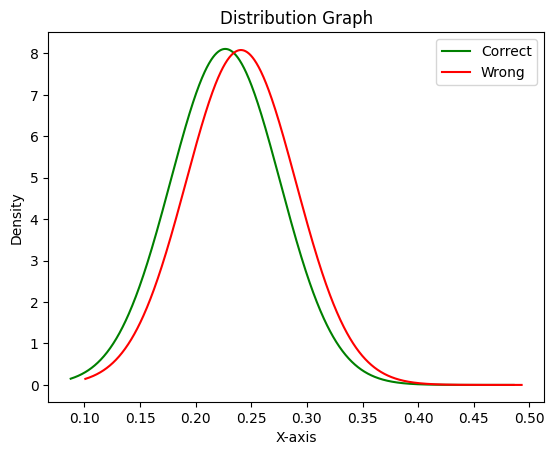

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

datac = c
dataw = w

# Plot KDE (Kernel Density Estimate)
kdec = norm.pdf(np.linspace(min(datac), max(datac), 1000), np.mean(datac), np.std(datac))
kdew = norm.pdf(np.linspace(min(dataw), max(dataw), 1000), np.mean(dataw), np.std(dataw))
plt.plot(np.linspace(min(datac), max(datac), 1000), kdec, color='green', label='Correct')
plt.plot(np.linspace(min(dataw), max(dataw), 1000), kdew, color='red', label='Wrong')

# Add labels and title
plt.title('Distribution Graph')
plt.xlabel('X-axis')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()
